# Day 3 - Afternoon

## Examples

Now that we have went over the basics of what's going on under the hood of a DFT code. Let's see these ideas occur in action!

We are going to look into the electronic structure of a **metal** and **insulator**.

**Question:** How does the electronic structure differ between a metal and insulator?

The two materials that we will investigate are
    
- Copper (Cu)
- Table salt (NaCl)

In [1]:
using DFTK
using Plots

### Copper (Cu)

#### Crystal structure

<img src="../structure/cu.png" alt="drawing" width="300" align="left"/>

In [2]:
# crystal structure of copper (face-centerd cubic)
convert2bohr = x -> x/0.53           # in-line function
a = b = c = convert2bohr(2.561);     # lattice parameters
α = β = γ = deg2rad(90); 
positions = [[0.0, 0.0, 0.0], 
             [0.0, 0.5, 0.5], 
             [0.5, 0.0, 0.5], 
             [0.5, 0.5, 0.0]];

In [3]:
lattice = [[a 0 0]; 
           [0 b 0]; 
           [0 0 c]]

3×3 Array{Float64,2}:
 4.83208  0.0      0.0
 0.0      4.83208  0.0
 0.0      0.0      4.83208

In [4]:
Cu = ElementPsp(:Cu, psp=load_psp("hgh/pbe/cu-q11.hgh"))
atoms = [Cu => positions]

1-element Array{Pair{ElementPsp,Array{Array{Float64,1},1}},1}:
 ElementPsp(29, :Cu, PspHgh(11, 0.53, [0.0, 0.0, 0.0, 0.0], 2, [0.43135505, 0.56139155, 0.26455485], [[9.69380507 -6.47016535 1.93595215; -6.47016535 11.50177396 -4.99860696; 1.93595215 -4.99860696 3.96752127], [2.5454733 -0.78463573; -0.78463573 0.92839352], [-12.82861406]], "hgh/pbe/cu-q11.hgh", "Cu GTH-PBE-q11")) => [[0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, 0.0]]

In [28]:
model = model_PBE(lattice, atoms, temperature=0.01);

In [29]:
Ecut = 10 # Ha
kgrid = [10, 10, 10];
basis = PlaneWaveBasis(model, Ecut, kgrid=kgrid);
println("n_electrons :      $(basis.model.n_electrons)")

n_electrons :      44


In [30]:
@time scfres = self_consistent_field(basis, mixing=KerkerMixing());

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -129.1462780777         NaN   1.67e+00    5.1 
  2   -129.4930816837   -3.47e-01   3.18e-01    3.7 
  3   -129.4982322146   -5.15e-03   4.69e-02    5.3 
  4   -129.4983838550   -1.52e-04   2.17e-03    1.0 
  5   -129.4984028432   -1.90e-05   9.78e-04    7.6 
  6   -129.4984042617   -1.42e-06   4.79e-04    3.7 
  7   -129.4984045983   -3.37e-07   7.16e-05    2.3 
  7.425417 seconds (2.64 M allocations: 1.480 GiB, 3.88% gc time)


In [31]:
scfres.energies

Energy breakdown:
    Kinetic             88.6673505
    AtomicLocal         -5.9150170
    AtomicNonlocal      13.2080525
    Ewald               -229.6190588
    PspCorrection       30.2855757
    Hartree             0.9630464 
    Xc                  -27.0710304
    Entropy             -0.0173235

    total               -129.498404598304


Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:06


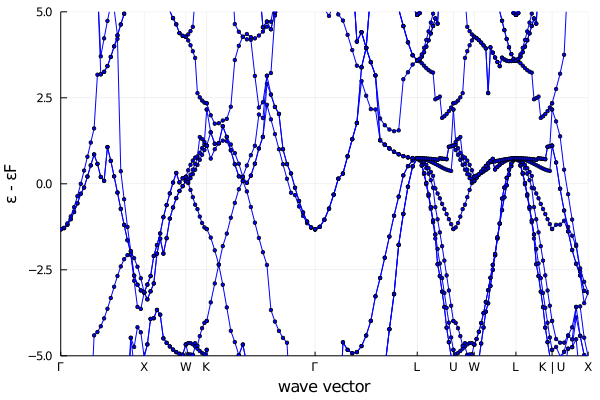

In [32]:
cu_bands = plot_bandstructure(scfres, kline_density=10, eigensolver=diag_full)
plot!(cu_bands, ylims=(-5, 5), ylabel="ε - εF")

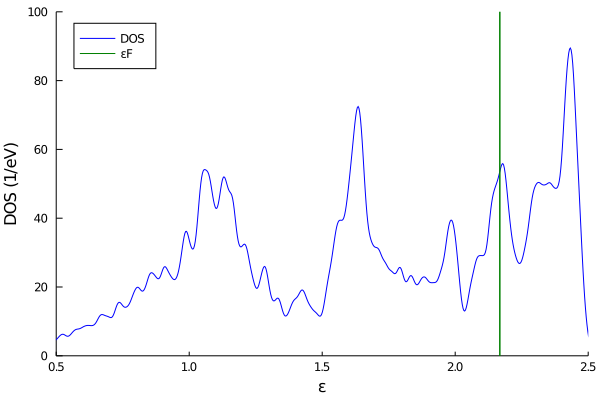

In [33]:
cu_dos = plot_dos(scfres)
plot!(cu_dos, ylabel="DOS (1/eV)", xlabel="ε", legend = :topleft, grid=false, xlims=(0.5, 2.5), ylims=(0, 100))

### Table Salt (NaCl)

#### Crystal structure
<img src="../structure/nacl.png" alt="drawing" width="300" align="left"/>

In [55]:
# crystal structure of copper (face-centerd cubic)
a = b = c = convert2bohr(5.69169);     # lattice parameters
α = β = γ = deg2rad(90);              # angles
Na_positions = [[0, 0, 0], [0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, 0.0]];
Cl_positions = [[0.5, 0.0, 0.0], [0.5, 0.5, 0.5], [0.0, 0.0, 0.5], [0.0, 0.5, 0.0]];

In [56]:
lattice = [[a 0 0]; [0 b 0]; [0 0 c]]

3×3 Array{Float64,2}:
 10.739   0.0     0.0
  0.0    10.739   0.0
  0.0     0.0    10.739

In [57]:
Na = ElementPsp(:Na, psp=load_psp(:Na, functional="pbe"))
Cl = ElementPsp(:Cl, psp=load_psp(:Cl, functional="pbe"))
atoms = [Na => Na_positions, Cl => Cl_positions];

In [58]:
model = model_PBE(lattice, atoms, temperature=0.01);

In [59]:
Ecut = 10 # Ha
kgrid = [10, 10, 10];
basis = PlaneWaveBasis(model, Ecut, kgrid=kgrid);
println()
println("Ecut        :      $Ecut")
println("fft_size    :      $(basis.fft_size)")
println("irrep. k    :      $(length(basis.kpoints))")
println("n_electrons :      $(basis.model.n_electrons)")
println()


Ecut        :      10
fft_size    :      (36, 36, 36)
irrep. k    :      35
n_electrons :      64



In [60]:
scfres = self_consistent_field(basis, mixing=KerkerMixing());

┌ Warning: One kpoint has a high minimum occupation 0.00017861757026310543. You should probably increase the number of bands.
└ @ DFTK /Users/harrisonlabollita/.julia/packages/DFTK/AFvqe/src/occupation.jl:86


n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -154.1376536001         NaN   9.09e+00    3.6 
  2   -210.5738678912   -5.64e+01   2.32e+00    4.0 
  3   -215.5450582881   -4.97e+00   7.64e-01    6.6 
  4   -215.7384859554   -1.93e-01   1.94e-01    3.3 
  5   -215.7655047037   -2.70e-02   6.19e-02    2.2 
  6   -215.7658358050   -3.31e-04   1.50e-02    1.0 
  7   -215.7660343577   -1.99e-04   3.15e-03    2.9 
  8   -215.7660450894   -1.07e-05   1.46e-03    4.7 
  9   -215.7660471115   -2.02e-06   1.61e-04    2.5 
 10   -215.7660471814   -6.99e-08   7.23e-05    5.6 


In [61]:
scfres.energies

Energy breakdown:
    Kinetic             93.0648675
    AtomicLocal         -223.2014950
    AtomicNonlocal      27.5284395
    Ewald               -136.5743247
    PspCorrection       0.6425560 
    Hartree             57.1613451
    Xc                  -34.3874198
    Entropy             -0.0000159

    total               -215.766047181378


Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:37


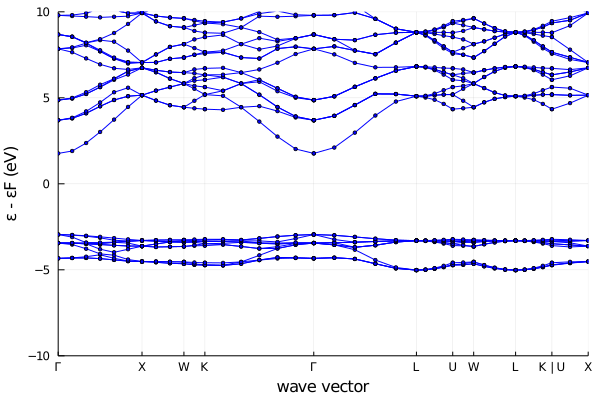

In [62]:
nacl_bands = plot_bandstructure(scfres, kline_density=5)
plot!(nacl_bands, ylabel="ε - εF (eV)", ylims=(-10, 10))

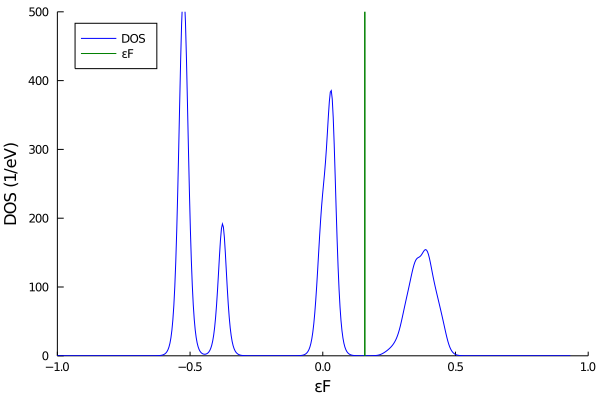

In [63]:
nacl_dos = plot_dos(scfres)
plot!(nacl_dos, ylabel="DOS (1/eV)", xlabel="εF", legend = :topleft, grid=false, xlims=(-1, 1), ylims=(0, 500))

# Compare & Contrast

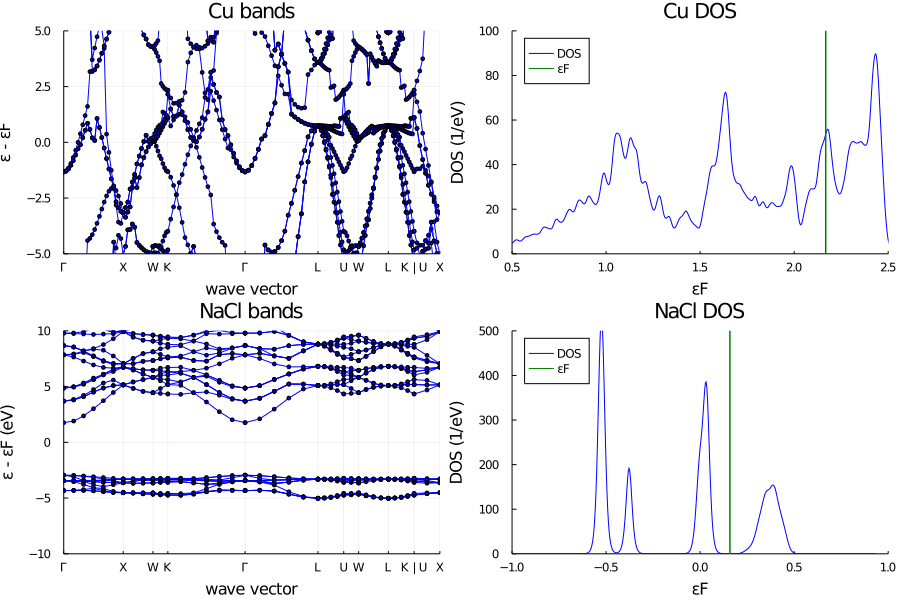

In [66]:
plot(cu_bands, cu_dos, nacl_bands, nacl_dos, layout = 4, size=(900, 600), title=["Cu bands" "Cu DOS" "NaCl bands" "NaCl DOS"])